# Model `ELBMF`

In [26]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 30
[I] n            : 50
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


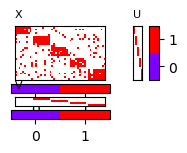

<Figure size 640x480 with 0 Axes>

In [27]:
from generators import BlockDiagonalMatrixGenerator

k = 5
overlap = -0.1

data = BlockDiagonalMatrixGenerator(m=30, n=50, k=k, overlap=[overlap, overlap])
data.generate(seed=1000)
data.add_noise(noise=[0.1, 0.1], seed=2000)

data.show_matrix()

In [28]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718780512
[I]   train_size   : 339
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718780512


In [29]:
import numpy as np

X = np.array(X_train.toarray(), dtype=np.float64)
X = torch.from_numpy(X).float()

In [30]:
import torch
from models import ELBMF

U, V = ELBMF(
    X                   = X,                  # a Boolean n*m matrix  
    n_components        = 5,                 # number of components
    l1reg               = 0.01,               # l1 coefficient
    l2reg               = 0.02,               # l2 coefficient
    regularization_rate = lambda t: 1.02**t,  # monotonically increasing regularization-rate function
    maxiter             = 3000,               # maximum number of iterations
    tolerance           = 1e-8,               # the threshold to the absolute difference between the current and previous losses determines the convergence
    beta                = 0.0001,             # inertial coefficient of iPALM
    callback            = None,               # e.g. lambda t, U, V, fn: print(t, fn)
    with_rounding       = True)               # rounds U and V in case of early stopping

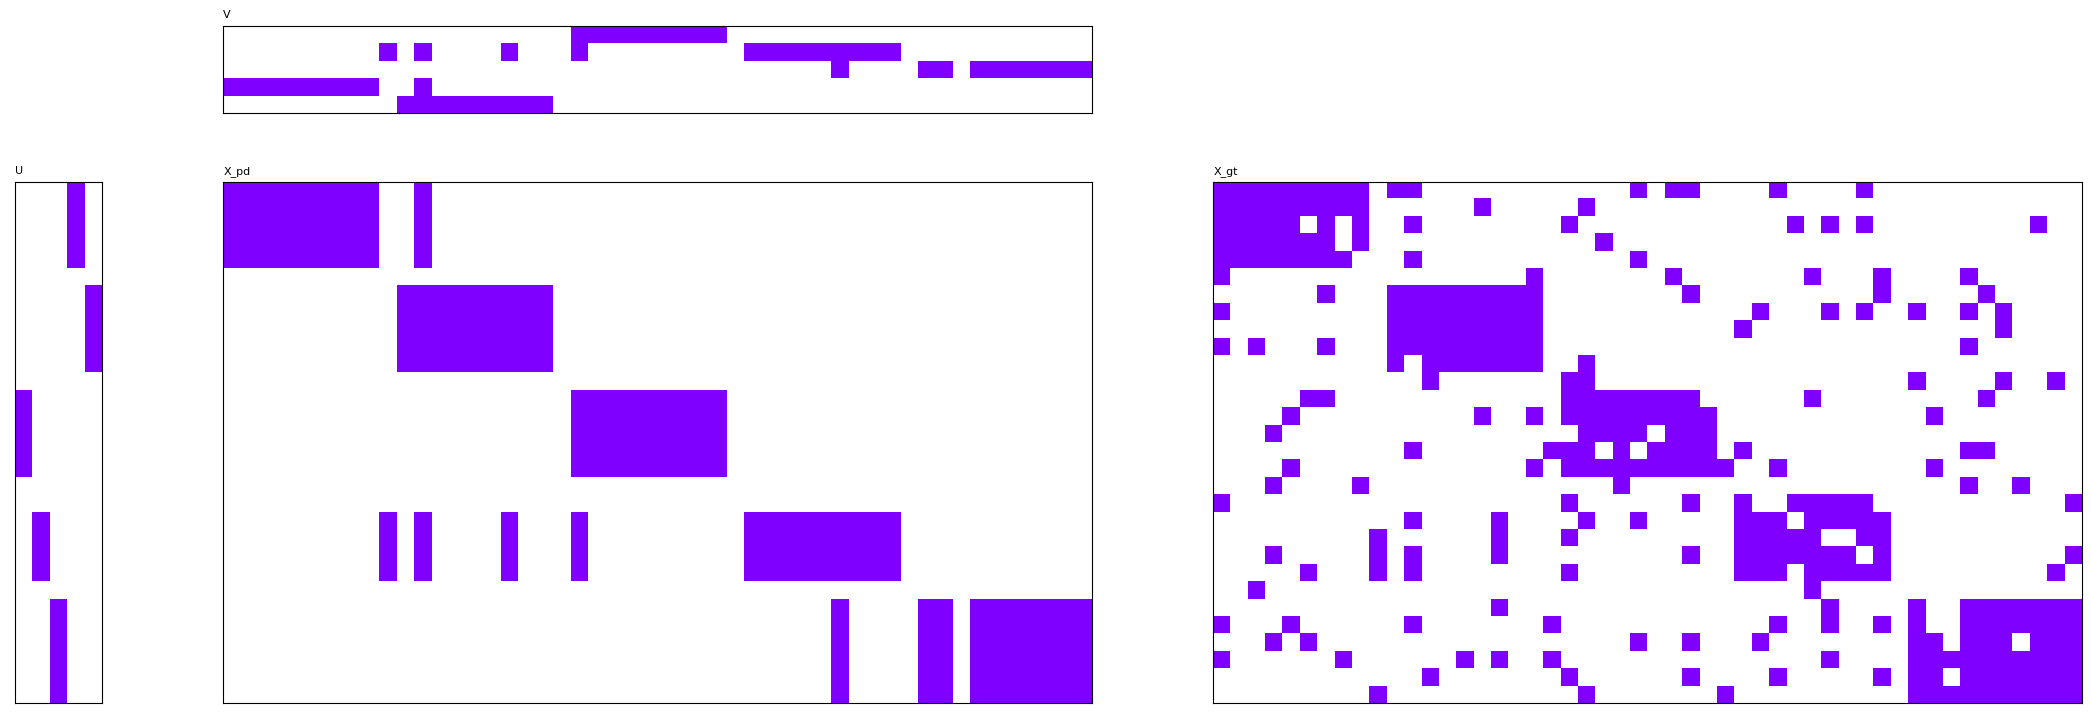

<Figure size 640x480 with 0 Axes>

In [31]:
from utils import show_matrix, matmul
from scipy.sparse import csr_matrix

U_sparse, V_sparse = csr_matrix(U), csr_matrix(V)
X_sparse = matmul(U_sparse, V_sparse, boolean=True, sparse=True)
X_original = csr_matrix(X)

show_matrix([(U_sparse, [1, 0], 'U'), (V_sparse, [0, 1], 'V'), (X_sparse, [1, 1], 'X_pd'), (X_original, [1, 2], 'X_gt')])